# Analyze 10 classes of ImageNet

In [1]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
savepath = "dataset/precomputed/imagenette"

In [2]:
all_class_colors = [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1)]

label_to_name = {0: 'tench',
 1: 'English_springer',
 2: 'cassette_player',
 3: 'chain_saw',
 4: 'church',
 5: 'French_horn',
 6: 'garbage_truck',
 7: 'gas_pump',
 8: 'golf_ball',
 9: 'parachute'}

## Load precomputed graph and lens

In [3]:
labels = np.load(f"{savepath}/labels.npy")
with open(f"{savepath}/train_nodes.txt","r") as f:
    lines = f.readlines()
    train_nodes = [int(i.strip()) for i in lines]
with open(f"{savepath}/val_nodes.txt","r") as f:
    lines = f.readlines()
    val_nodes = [int(i.strip()) for i in lines]
with open(f"{savepath}/test_nodes.txt","r") as f:
    lines = f.readlines()
    test_nodes = [int(i.strip()) for i in lines]
ei,ej,e = [],[],[]
with open(f"{savepath}/edge_list.txt","r") as f:
    lines = f.readlines()
    num_nodes = int(lines[0].strip().split(' ')[0])
    for line in lines[1::]:
        line = line.strip().split(' ')
        ei.append(int(line[0]))
        ej.append(int(line[1]))
        e.append(int(line[2]))
G = sp.csr_matrix((e,(ei,ej)),(num_nodes,num_nodes))
preds = np.load(f"{savepath}/prediction_lens.npy")
pred_labels = np.argmax(preds,1)

## Compute Reeb graph and estimated errors

In [6]:
from GTDA.GTDA_utils import compute_reeb, NN_model
from GTDA.GTDA import GTDA

nn_model = NN_model()
nn_model.preds = preds
nn_model.labels = labels
nn_model.A = G
nn_model.train_mask = np.zeros(G.shape[0])
nn_model.train_mask[train_nodes] = 1
nn_model.val_mask = np.zeros(G.shape[0])
nn_model.val_mask[val_nodes] = 1
nn_model.test_mask = np.zeros(G.shape[0])
nn_model.test_mask[test_nodes] = 1
smallest_component = 25
overlap = (0,0.01) # only extend each bin's right boundary by 1%
labels_to_eval = list(range(preds.shape[1]))
GTDA_record = compute_reeb(GTDA,nn_model,labels_to_eval,smallest_component,overlap,extra_lens=None,
    node_size_thd=5,reeb_component_thd=5,nprocs=10,device='cuda',split_thd=0.001,nsteps_preprocess=10)

Preprocess lens


100%|██████████| 6/6 [00:00<00:00, 3989.51it/s]


Iteration 1
1 components to split
Grouping took 0.0024251937866210938 seconds


100%|██████████| 1/1 [00:00<00:00,  8.43it/s]


Min/max largest difference: 1.0, 1.0
New components sizes:
Counter({1: 3, 1339: 1, 2: 1, 12050: 1})
Splitting took 0.12012815475463867 seconds
Iteration 2
2 components to split
Grouping took 0.002717256546020508 seconds


100%|██████████| 2/2 [00:00<00:00, 71.36it/s]


Min/max largest difference: 0.4610409332748757, 1.0
New components sizes:
Counter({1: 17, 2: 4, 10702: 1, 1346: 1, 1313: 1, 3: 1})
Splitting took 0.02958202362060547 seconds
Iteration 3
3 components to split
Grouping took 0.002774477005004883 seconds


100%|██████████| 3/3 [00:00<00:00, 108.10it/s]


Min/max largest difference: 0.22690042454837966, 1.0
New components sizes:
Counter({1: 43, 2: 9, 9365: 1, 1334: 1, 5: 1, 1327: 1, 1266: 1, 3: 1, 4: 1})
Splitting took 0.029217243194580078 seconds
Iteration 4
4 components to split
Grouping took 0.0030286312103271484 seconds


100%|██████████| 4/4 [00:00<00:00, 139.53it/s]


Min/max largest difference: 0.11325769658853369, 1.0
New components sizes:
Counter({1: 144, 2: 16, 3: 10, 5: 4, 4: 2, 8126: 1, 1230: 1, 1264: 1, 1301: 1, 1142: 1})
Splitting took 0.030174732208251953 seconds
Iteration 5
5 components to split
Grouping took 0.0031566619873046875 seconds


100%|██████████| 5/5 [00:00<00:00, 41.83it/s]


Min/max largest difference: 0.05587296160426769, 1.0
New components sizes:
Counter({1: 238, 2: 29, 3: 7, 5: 5, 4: 2, 6: 2, 6773: 1, 1344: 1, 1228: 1, 1183: 1, 1099: 1, 1075: 1, 7: 1})
Splitting took 0.12091588973999023 seconds
Iteration 6
6 components to split
Grouping took 0.003725767135620117 seconds


100%|██████████| 6/6 [00:00<00:00, 207.87it/s]


Min/max largest difference: 0.027533367953353705, 1.0
New components sizes:
Counter({1: 262, 2: 47, 3: 19, 4: 7, 5: 4, 6: 4, 8: 3, 12: 2, 9: 2, 5433: 1, 1330: 1, 1296: 1, 1171: 1, 998: 1, 31: 1, 14: 1, 10: 1, 913: 1, 26: 1, 11: 1, 926: 1})
Splitting took 0.0303652286529541 seconds
Iteration 7
9 components to split
Grouping took 0.003773212432861328 seconds


100%|██████████| 9/9 [00:00<00:00, 273.74it/s]


Min/max largest difference: 0.013702089958987806, 1.0
New components sizes:
Counter({1: 362, 2: 60, 3: 20, 4: 6, 6: 4, 8: 4, 5: 3, 4089: 1, 1332: 1, 1252: 1, 1217: 1, 1064: 1, 16: 1, 872: 1, 9: 1, 218: 1, 633: 1, 735: 1, 20: 1, 7: 1, 10: 1, 23: 1})
Splitting took 0.03458523750305176 seconds
Iteration 8
9 components to split
Grouping took 0.004572629928588867 seconds


100%|██████████| 9/9 [00:00<00:00, 307.65it/s]


Min/max largest difference: 0.006832289742180642, 0.999997914127931
New components sizes:
Counter({1: 396, 2: 62, 4: 10, 5: 10, 3: 9, 7: 5, 6: 4, 16: 2, 15: 2, 2732: 1, 1338: 1, 1288: 1, 1088: 1, 41: 1, 1055: 1, 11: 1, 798: 1, 163: 1, 626: 1, 14: 1, 149: 1, 13: 1, 71: 1, 549: 1, 364: 1, 180: 1, 9: 1, 187: 1})
Splitting took 0.03065347671508789 seconds
Iteration 9
15 components to split
Grouping took 0.004845857620239258 seconds


100%|██████████| 15/15 [00:00<00:00, 469.87it/s]


Min/max largest difference: 0.003413760765434315, 0.9999433709942126
New components sizes:
Counter({1: 366, 2: 54, 3: 18, 4: 15, 5: 6, 6: 5, 7: 4, 9: 2, 8: 2, 40: 2, 1372: 1, 1340: 1, 1276: 1, 16: 1, 1215: 1, 875: 1, 19: 1, 28: 1, 20: 1, 14: 1, 934: 1, 482: 1, 243: 1, 11: 1, 353: 1, 217: 1, 10: 1, 123: 1, 13: 1, 325: 1, 128: 1, 158: 1, 32: 1, 141: 1, 159: 1, 139: 1, 144: 1, 68: 1})
Splitting took 0.03345680236816406 seconds
Iteration 10
23 components to split
Grouping took 0.006418704986572266 seconds


100%|██████████| 23/23 [00:00<00:00, 631.06it/s]


Min/max largest difference: 0.0016850537352942618, 0.9732175714817299
New components sizes:
Counter({1: 436, 2: 88, 3: 32, 4: 16, 5: 9, 7: 4, 10: 4, 6: 3, 9: 3, 12: 2, 14: 2, 39: 2, 15: 2, 133: 2, 18: 2, 1337: 1, 1308: 1, 1187: 1, 1075: 1, 20: 1, 680: 1, 79: 1, 55: 1, 32: 1, 28: 1, 13: 1, 711: 1, 262: 1, 149: 1, 212: 1, 114: 1, 137: 1, 110: 1, 25: 1, 200: 1, 62: 1, 17: 1, 119: 1, 123: 1, 117: 1, 80: 1, 86: 1, 61: 1, 34: 1, 26: 1})
Splitting took 0.03803372383117676 seconds
Iteration 11
30 components to split
Grouping took 0.0074765682220458984 seconds


100%|██████████| 30/30 [00:00<00:00, 744.00it/s]


Min/max largest difference: 0.0010062556117326957, 0.4680590190097429
New components sizes:
Counter({1: 428, 2: 76, 3: 37, 4: 17, 5: 10, 7: 9, 6: 7, 8: 6, 9: 5, 14: 3, 13: 3, 10: 3, 25: 3, 24: 2, 18: 2, 60: 2, 66: 2, 12: 2, 1289: 1, 1256: 1, 1021: 1, 972: 1, 193: 1, 451: 1, 390: 1, 238: 1, 222: 1, 15: 1, 179: 1, 191: 1, 47: 1, 34: 1, 20: 1, 58: 1, 117: 1, 36: 1, 31: 1, 11: 1, 59: 1, 52: 1, 21: 1, 33: 1, 83: 1, 43: 1, 53: 1, 49: 1, 32: 1})
Splitting took 0.04159188270568848 seconds
Iteration 12
29 components to split
Grouping took 0.007028341293334961 seconds


100%|██████████| 29/29 [00:00<00:00, 823.24it/s]


Min/max largest difference: 0.0008867839230987442, 0.22942368075160335
New components sizes:
Counter({1: 423, 2: 101, 3: 36, 4: 28, 6: 12, 5: 12, 7: 9, 8: 3, 13: 2, 11: 2, 18: 2, 232: 2, 19: 2, 25: 2, 1181: 1, 1113: 1, 35: 1, 10: 1, 892: 1, 801: 1, 46: 1, 24: 1, 103: 1, 27: 1, 180: 1, 124: 1, 220: 1, 167: 1, 166: 1, 118: 1, 104: 1, 77: 1, 63: 1, 66: 1, 14: 1, 31: 1, 23: 1, 47: 1, 9: 1, 20: 1, 21: 1, 16: 1})
Splitting took 0.03657197952270508 seconds
Iteration 13
20 components to split
Grouping took 0.005468845367431641 seconds


100%|██████████| 20/20 [00:00<00:00, 729.82it/s]


Min/max largest difference: 0.0018199774256007252, 0.11442933885446227
New components sizes:
Counter({1: 361, 2: 81, 3: 31, 4: 12, 5: 10, 6: 5, 8: 5, 7: 4, 9: 2, 10: 2, 27: 1, 1037: 1, 1020: 1, 675: 1, 24: 1, 33: 1, 16: 1, 23: 1, 223: 1, 525: 1, 94: 1, 102: 1, 206: 1, 114: 1, 32: 1, 21: 1, 29: 1, 52: 1, 129: 1, 18: 1, 145: 1, 117: 1, 105: 1, 19: 1, 101: 1, 75: 1, 46: 1, 20: 1, 25: 1, 26: 1})
Splitting took 0.028626441955566406 seconds
Iteration 14
22 components to split
Grouping took 0.005789279937744141 seconds


100%|██████████| 22/22 [00:00<00:00, 816.17it/s]


Min/max largest difference: 0.001665476085925488, 0.08514157676596239
New components sizes:
Counter({1: 270, 2: 84, 3: 26, 4: 10, 5: 8, 6: 5, 7: 5, 12: 3, 9: 3, 10: 2, 183: 2, 20: 2, 99: 2, 8: 2, 917: 1, 15: 1, 16: 1, 824: 1, 112: 1, 391: 1, 179: 1, 292: 1, 208: 1, 121: 1, 57: 1, 37: 1, 110: 1, 11: 1, 62: 1, 18: 1, 13: 1, 24: 1, 63: 1, 32: 1, 31: 1, 28: 1})
Splitting took 0.0281982421875 seconds
Iteration 15
20 components to split
Grouping took 0.0050106048583984375 seconds


100%|██████████| 20/20 [00:00<00:00, 861.01it/s]


Min/max largest difference: 0.001826460152331566, 0.028515211385937045
New components sizes:
Counter({1: 247, 2: 58, 3: 20, 4: 11, 5: 8, 8: 4, 11: 4, 6: 3, 47: 2, 7: 2, 9: 2, 28: 2, 19: 1, 74: 1, 686: 1, 234: 1, 25: 1, 498: 1, 215: 1, 55: 1, 69: 1, 104: 1, 154: 1, 140: 1, 43: 1, 73: 1, 10: 1, 168: 1, 174: 1, 110: 1, 54: 1, 34: 1, 82: 1, 18: 1, 33: 1, 85: 1, 38: 1, 13: 1, 30: 1, 26: 1})
Splitting took 0.024442672729492188 seconds
Iteration 16
27 components to split
Grouping took 0.0066297054290771484 seconds


100%|██████████| 27/27 [00:00<00:00, 1002.31it/s]


Min/max largest difference: 0.0017138787275859768, 0.017958838063754534
New components sizes:
Counter({1: 244, 2: 49, 3: 21, 4: 11, 5: 10, 7: 6, 14: 3, 6: 3, 23: 3, 9: 2, 20: 2, 10: 2, 445: 1, 188: 1, 153: 1, 256: 1, 169: 1, 207: 1, 158: 1, 98: 1, 149: 1, 128: 1, 50: 1, 16: 1, 34: 1, 80: 1, 74: 1, 69: 1, 60: 1, 64: 1, 11: 1, 18: 1, 8: 1, 35: 1, 40: 1, 33: 1, 26: 1, 19: 1})
Splitting took 0.028429508209228516 seconds
Iteration 17
21 components to split
Grouping took 0.004714012145996094 seconds


100%|██████████| 21/21 [00:00<00:00, 1018.33it/s]


Min/max largest difference: 0.0008625905661918676, 0.016303963893570344
New components sizes:
Counter({1: 218, 2: 59, 3: 16, 4: 10, 6: 6, 8: 4, 5: 4, 9: 3, 13: 3, 14: 3, 12: 2, 241: 1, 157: 1, 17: 1, 68: 1, 66: 1, 32: 1, 94: 1, 77: 1, 148: 1, 62: 1, 43: 1, 105: 1, 20: 1, 7: 1, 143: 1, 10: 1, 103: 1, 33: 1, 48: 1, 11: 1, 81: 1, 54: 1, 60: 1, 59: 1, 51: 1, 22: 1, 16: 1, 21: 1, 34: 1})
Splitting took 0.02198338508605957 seconds
Iteration 18
20 components to split
Grouping took 0.0048177242279052734 seconds


100%|██████████| 20/20 [00:00<00:00, 1118.56it/s]


Min/max largest difference: 0.0017640422984137594, 0.014021722952613957
New components sizes:
Counter({1: 112, 2: 41, 3: 21, 4: 8, 6: 5, 5: 3, 10: 3, 7: 3, 47: 2, 13: 2, 11: 2, 8: 2, 19: 2, 46: 1, 83: 1, 151: 1, 50: 1, 130: 1, 89: 1, 101: 1, 90: 1, 61: 1, 43: 1, 59: 1, 22: 1, 40: 1, 39: 1, 36: 1, 12: 1, 45: 1, 25: 1, 24: 1})
Splitting took 0.019186735153198242 seconds
Iteration 19
17 components to split
Grouping took 0.003718137741088867 seconds


100%|██████████| 17/17 [00:00<00:00, 1102.40it/s]


Min/max largest difference: 0.0013042590960110484, 0.013344254763064889
New components sizes:
Counter({1: 125, 2: 29, 4: 11, 3: 8, 5: 6, 7: 5, 8: 3, 11: 3, 6: 3, 33: 2, 15: 2, 47: 2, 32: 2, 29: 2, 25: 2, 61: 1, 55: 1, 19: 1, 36: 1, 74: 1, 17: 1, 28: 1, 31: 1, 41: 1, 9: 1, 37: 1})
Splitting took 0.016907691955566406 seconds
Iteration 20
16 components to split
Grouping took 0.0036385059356689453 seconds


100%|██████████| 16/16 [00:00<00:00, 1198.44it/s]


Min/max largest difference: 0.001089430833549226, 0.007856247185996654
New components sizes:
Counter({1: 93, 2: 22, 3: 14, 4: 8, 5: 5, 7: 3, 6: 3, 17: 2, 14: 2, 15: 2, 67: 1, 60: 1, 40: 1, 20: 1, 10: 1, 30: 1, 23: 1, 21: 1, 8: 1})
Splitting took 0.014447689056396484 seconds
Iteration 21
4 components to split
Grouping took 0.0014011859893798828 seconds


100%|██████████| 4/4 [00:00<00:00, 1190.04it/s]


Min/max largest difference: 0.003482850014644736, 0.003781694440741672
New components sizes:
Counter({1: 30, 2: 7, 6: 2, 3: 2, 9: 1, 10: 1, 15: 1, 31: 1, 21: 1, 28: 1, 17: 1, 4: 1})
Splitting took 0.004974365234375 seconds
Iteration 22
2 components to split
Grouping took 0.0004413127899169922 seconds


100%|██████████| 2/2 [00:00<00:00, 1064.00it/s]


Min/max largest difference: 0.003004869868579285, 0.003225571731074184
New components sizes:
Counter({1: 22, 2: 3, 3: 2, 5: 1, 6: 1, 10: 1, 4: 1})
Splitting took 0.003550291061401367 seconds
Number of samples included before filtering: 13394
Number of samples included after filtering: 4383
Merge reeb nodes...


100%|██████████| 6444/6444 [00:00<00:00, 6511.85it/s]


Number of samples included after merging: 12317
Merge reeb nodes...


100%|██████████| 333/333 [00:00<00:00, 3528.19it/s]


Number of samples included after merging: 13394
Merge reeb nodes...


0it [00:00, ?it/s]


Number of samples included after merging: 13394
Build reeb graph...


100%|██████████| 27/27 [00:00<00:00, 3551.71it/s]


Number of samples included after merging reeb components: 13394
Total time for building reeb graph is 2.5409016609191895 seconds
Compute mixing rate for each sample


## Visualize a component of GTDA results

100%|██████████| 72/72 [00:00<00:00, 566.87it/s]


Text(0.5, 1.0, 'estimated errors')

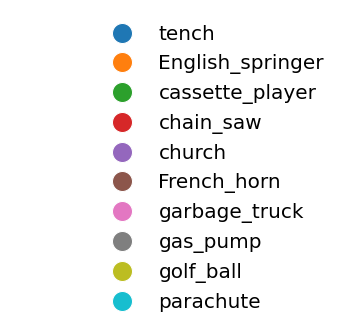

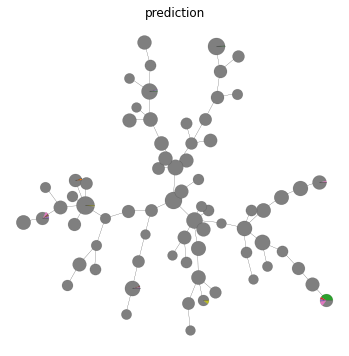

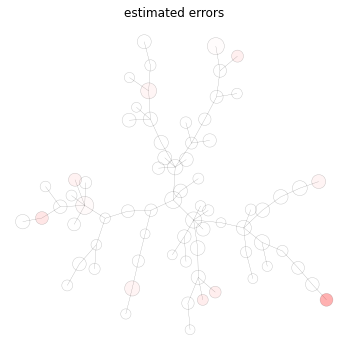

In [14]:
import networkx as nx
from GTDA.GTDA_utils import find_components, plot_reeb_component
import pandas as pd
from matplotlib.lines import Line2D

gtda = GTDA_record['gtda']
g_reeb = GTDA_record['g_reeb']
reeb_components = find_components(g_reeb,size_thd=0)[1]
component_index = 6
component = reeb_components[component_index]
g_sub = g_reeb[component,:][:,component]
xcoords = np.zeros(len(component))
ycoords = np.zeros(len(component))
pos_tmp = nx.kamada_kawai_layout(nx.from_scipy_sparse_matrix(g_sub))
for i in range(len(component)):
    xcoords[i] = pos_tmp[i][0]
    ycoords[i] = pos_tmp[i][1]
df = pd.DataFrame({'x':xcoords,'y':ycoords,'sizes':40*gtda.node_sizes[gtda.filtered_nodes[component]]**0.5})

patches = []
for label_to_eval in labels_to_eval:
    patches.append(
        Line2D(
            [0],[0],marker='o',markerfacecolor=all_class_colors[label_to_eval],
            label=f"{label_to_name[label_to_eval]}",color='w',markersize=20))
fig_legend,ax_legend = plt.subplots(figsize=(6, 1))
ax_legend.legend(handles=patches,fontsize=20,framealpha=0,ncol=1)
ax_legend.axis('off')

fig,ax = plt.subplots(figsize=(6,6))
fig,ax = plot_reeb_component(g_sub,df,gtda.node_colors_class[gtda.filtered_nodes[component]],
    labels_to_eval=labels_to_eval,all_class_colors=all_class_colors,fig=fig,ax=ax)
ax.set_title('prediction')

fig,ax = plt.subplots(figsize=(6,6))
node_colors = [(1,0,0,i) for i in gtda.node_colors_mixing[gtda.filtered_nodes[component]]]
fig,ax = plot_reeb_component(g_sub,df,node_colors,
    labels_to_eval=labels_to_eval,all_class_colors=all_class_colors,fig=fig,ax=ax,is_plotting_error=True)
ax.set_title('estimated errors')

# Embed images on this component

In [20]:
from tqdm import tqdm

with open(f"{savepath}/imgs_list.txt","r") as f:
    lines = f.readlines()
    imgs_list = [i.strip() for i in lines]

nodes = []
for reeb_node in component:
    nodes += gtda.final_components_filtered[gtda.filtered_nodes[reeb_node]]
nodes_map = {node:i for i,node in enumerate(nodes)}


A_reeb = nx.from_scipy_sparse_matrix(gtda.A_reeb[nodes,:][:,nodes])
degs = np.sum(gtda.A_reeb,0).A[0][nodes]
path_lengths = dict(nx.shortest_path_length(A_reeb))
shortest_dists = {}
g_reeb_sub = g_reeb.tocsr()[component,:][:,component]
for i in tqdm(range(g_reeb_sub.shape[0])):
    ci = np.array(gtda.final_components_filtered[gtda.filtered_nodes[component[i]]])
    for j in g_reeb_sub[i].indices:
        cj = gtda.final_components_filtered[gtda.filtered_nodes[component[j]]]
        ci_dists = []
        for curr_i in ci:
            curr_i = nodes_map[curr_i]
            curr_dist = float('inf')
            for curr_j in cj: 
                curr_j = nodes_map[curr_j]
                curr_dist = min(curr_dist,path_lengths[curr_i][curr_j])
            ci_dists.append((curr_dist,-1*degs[i]))
        ci_dists = np.array(ci_dists, dtype=[('x', '<i4'), ('y', '<i4')])
        shortest_dists[(i,j)] = ci[np.argsort(ci_dists,order=('x','y'))]

100%|██████████| 72/72 [00:00<00:00, 559.30it/s]


(-1.12, 1.0798296844614899, -0.7978536850428187, 0.9542729335793254)

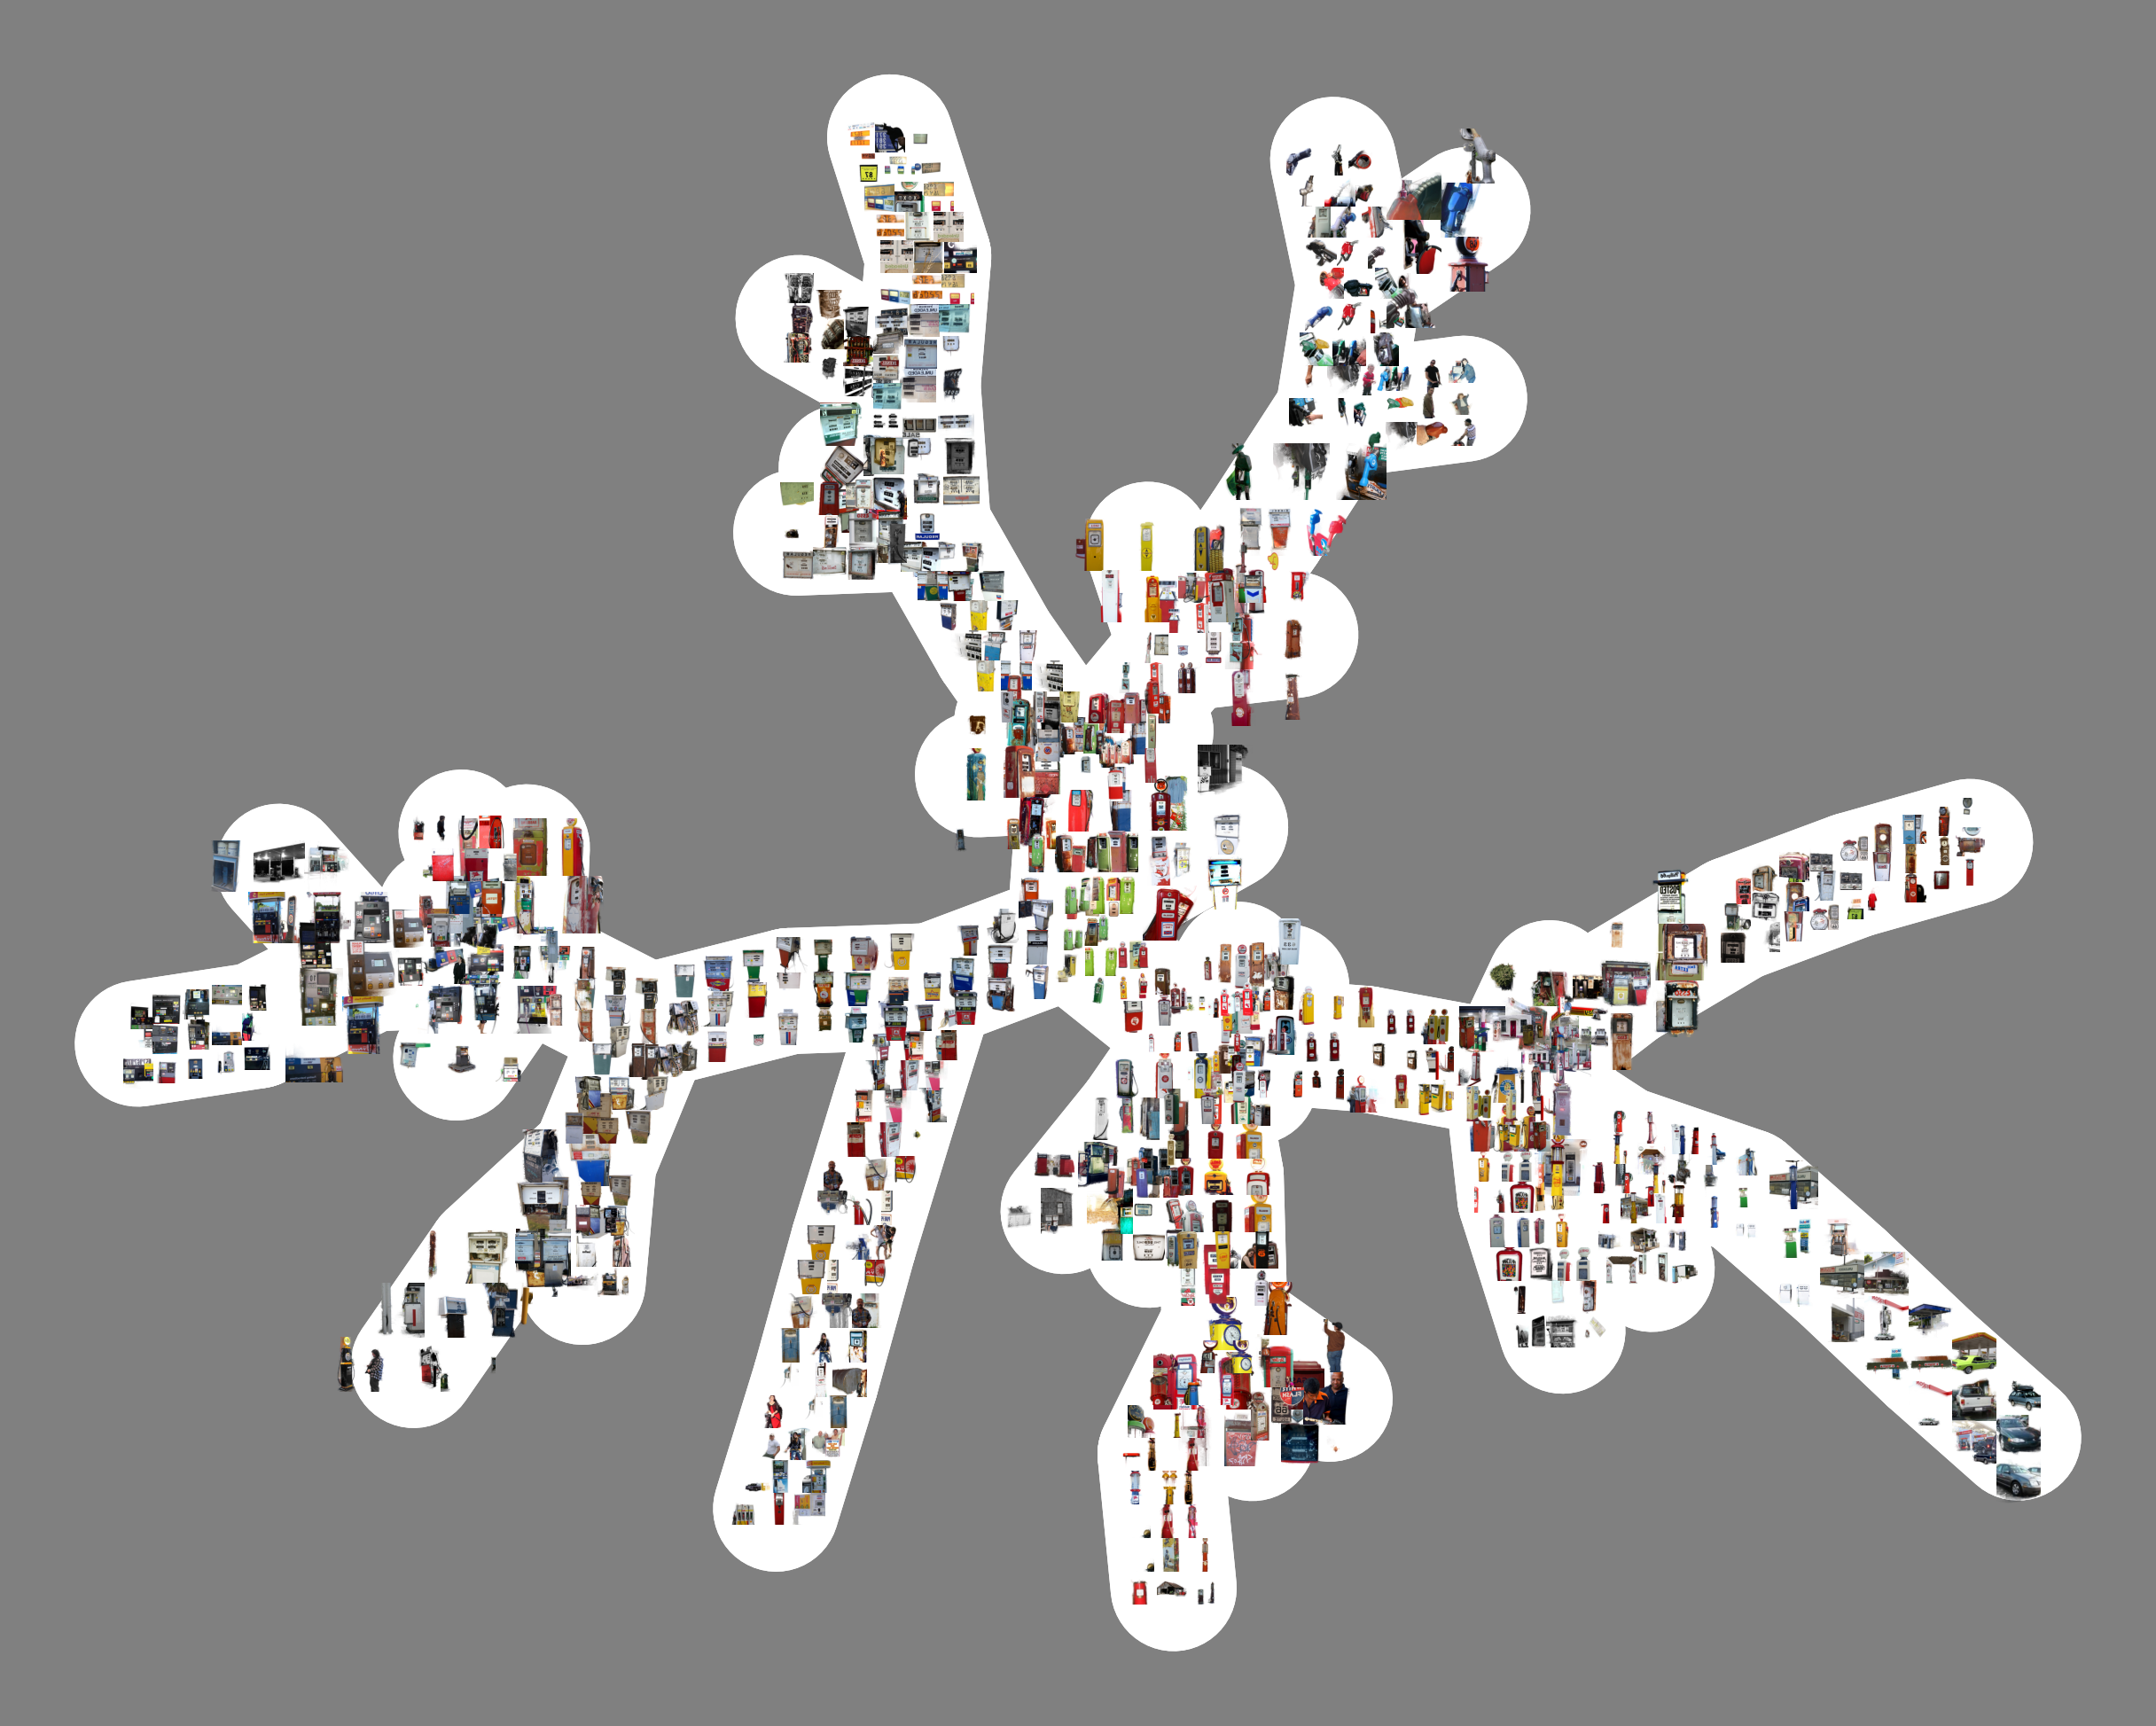

In [32]:
from collections import defaultdict
from GTDA.GTDA_utils import align_images, remove_img_bg
from PIL import Image


coords = np.vstack([xcoords,ycoords])
scale = 0.06
fig,ax = plt.subplots(figsize=(12,12),dpi=256,facecolor='grey')
neighs = defaultdict(list)
all_images_embeded = {}
g_reeb_sub = g_reeb_sub.tocoo()
for i,j in zip(g_reeb_sub.row,g_reeb_sub.col):
    neighs[i].append(j)
for i in range(len(component))[::-1]:
    start_pos = coords[:,i]
    for k,neigh in enumerate(neighs[i]):
        end_pos = (start_pos+coords[:,neigh])/2
        images = [remove_img_bg(Image.open(imgs_list[i])) for i in shortest_dists[(i,neigh)]]
        num_images_embeded = align_images(
            start_pos,end_pos,scale,images,ax,3,k==0,flipped=True)
        all_images_embeded[(i,neigh)] = shortest_dists[(i,neigh)][0:num_images_embeded]

for ei,ej in zip(g_reeb_sub.row,g_reeb_sub.col):
    ax.plot(
        [coords[0][ei],coords[0][ej]],[coords[1][ei],coords[1][ej]],c='white',
        lw=40,zorder=-1,solid_capstyle='round',alpha=1)
ax.set_xlim((np.min(coords[0])-scale*2,np.max(coords[0])+scale*2))
ax.set_ylim((np.min(coords[1])-scale*2,np.max(coords[1])+scale*2))
ax.axis('off')